<a href="https://colab.research.google.com/github/10100111/Display-of-HW1/blob/main/45_Pro_%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B2_%D0%B3%D0%B5%D0%BD%D0%B5%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5_%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%D1%8B_%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Один из популярных методов на основе генетических алгоритмов K-means, он хорошо изложен на примере датасета "Ирисы Фишера". Здесь выбираются случайным образом точки, вывод будет каждый раз меняться.

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
df, target = load_iris(return_X_y=True, as_frame=True)
df['target'] = target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# Теперь проведем кластеризацию методом k-средних и запишем метки в столбец 'cluster':
cl = KMeans(n_clusters=3) # известно, что у нас 3 группы, описываем модель
labels = cl.fit_predict(df) # Предсказание на всем наборе данных

In [ ]:
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
df['cluster'] = labels
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [ ]:
df[df['target']==df['cluster']].shape[0], df.shape[0]

(149, 150)

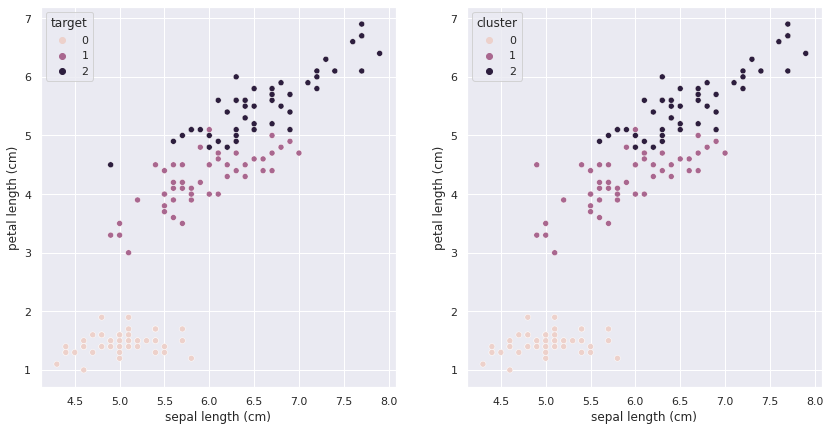

In [ ]:
# Визуализация по двум параметрам ('sepal length (cm)', 'petal length (cm)') подтверждает наш вывод о хорошей кластеризации:
fig, axis = plt.subplots(1,2, figsize=(14,7))
sns.scatterplot(data = df, ax = axis[0], x = 'sepal length (cm)', y = 'petal length (cm)', hue='target')
sns.scatterplot(data = df, ax = axis[1], x = 'sepal length (cm)', y = 'petal length (cm)', hue='cluster')

In [ ]:
# Имея в распоряжении классы, мы можем сгруппировать по ним объекты и подсчитатьагрегирующие метрики, например среднее:
df.drop('target', axis=1).groupby('cluster').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
cluster,,,,
0,5.006000,3.428000,1.462000,0.246000
1,5.915686,2.764706,4.264706,1.333333
2,6.622449,2.983673,5.573469,2.032653
